# 04. Visual Comparison - OSM Carto

16 Aug 2020

## Colour elements according to the OpenStreetMap Carto Stylesheets

https://github.com/gravitystorm/openstreetmap-carto/tree/master/style

Purely visual comparison by colour:
- no line weights, line styles, icons etc.
- visual check that lines are lines, polygons are polygons, points are points etc.

The link under each place name is to the relavant location on [OpenStreetMap.org](https://www.openstreetmap.org)

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt

import geopandas as gpd
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Querty tags

In [ ]:
tags = {'landuse': True, 'building': True, 'highway': True, 'waterway': True, 'amenity': True, 'natural': True, 'aeroway': True, 'shop': True, 'barrier': True, 'leisure': True}

### Plot Settings

Copies the colours in the Carto Stylesheets

In [221]:
# colours https://github.com/gravitystorm/openstreetmap-carto/blob/master/style/landcover.mss
facecolors = {
    'aeroway': {
        'runway':'#bbc',
        'other':'red',
    },
    'amenity': {
        'fire_station':'#F3E3DD',
        'parking':'#eeeeee',
        'pub':'none',
        'societal_amenities':'#ffffe5',
        'other':'none',
    },
    'barrier': {
        'other':'red',
    },
    'building': {
        'other':'#d9d0c9'
    },
    'highway': {
        'pedestrian':'#dddde8',
        'other':'red'
    },
    'landuse': {
        'aquaculture':'yellow',
        'allotments':'#c9e1bf',
        'cemetery':'#aacbaf',
        'commercial':'#f2dad9',
        'construction':'#c7c7b4',
        'farm':'red',
        'farmland':'#eef0d5',
        'farmyard':'#f5dcba',
        'forest':'#add19e',
        'grass':'#cdebb0',
        'industrial':'#ebdbe8',
        'meadow':'#cdebb0',
        'railway':'#ebdbe8',
        'recreation_ground':'brown',
        'residential':'#e0dfdf',
        'retail':'#ffd6d1',
        'park':'#c8facc', # leisure?
        'other':'red'
    },
    'leisure': {
        'park':'#c8facc',
        'pitch':'#aae0cb',
        'other':'red',
    },
    'natural': {
        'forest':'#add19e',
        'scrub':'#c8d7ab',
        'water':'#aad3df',
        'other':'red',
    },
    'power': {
        'other':'red',
    },
    'shop': {
        'other':'#ac39ac'
    },
    'waterway': {
        'other':'#aad3df',
    }
}
facecolors['amenity']['grave_yard'] = facecolors['landuse']['cemetery']
facecolors['amenity']['cemetery'] = facecolors['landuse']['cemetery']
facecolors['amenity']['hospital'] = facecolors['amenity']['societal_amenities']
facecolors['amenity']['school'] = facecolors['amenity']['societal_amenities']

facecolors['landuse']['brownfield'] = facecolors['landuse']['construction']
facecolors['landuse']['grave_yard'] = facecolors['landuse']['cemetery']
facecolors['landuse']['leisure'] = facecolors['landuse']['park']
facecolors['landuse']['recreation_ground'] = facecolors['landuse']['leisure']

facecolors['leisure']['playground'] = facecolors['landuse']['leisure']
facecolors['leisure']['recreation_ground'] = facecolors['landuse']['leisure']
facecolors['leisure']['track'] = facecolors['leisure']['pitch']

facecolors['natural']['wood'] = facecolors['natural']['forest']
facecolors['natural']['wetland'] = facecolors['landuse']['grass']

facecolors['power']['other'] = facecolors['landuse']['industrial']

# Personal added
facecolors['barrier']['fence'] = 'none'
facecolors['barrier']['hedge'] = 'none'

facecolors['landuse']['aquaculture'] = facecolors['landuse']['leisure']
facecolors['landuse']['conservation'] = facecolors['natural']['forest']
facecolors['landuse']['greenfield'] = 'none'

facecolors['leisure']['common'] = 'none'
facecolors['leisure']['stadium'] = 'none'

In [149]:
# colours https://github.com/gravitystorm/openstreetmap-carto/blob/master/style/landcover.mss
linecolors = {
    'aeroway': {
        'runway':'#bbc',
        'other':'red',
    },
    'amenity': {
        'other':'red',
    },
    'barrier': {
        'kerb':'none',
        'other':'#444',
    },
    'building': {
        'other':'red',
    },
    'highway': {
        'cycleway':'blue',
        'footway':'salmon',
        'motorway':'#e892a2',
        'pedestrian':'#dddde8',
        'primary':'#fcd6a4',
        'residential':'#ffffff',
        'road':'#ddd',
        'secondary':'#f7fabf',
        'tertiary':'#ffffff',
        'track':'#996600',
        'trunk':'#f9b29c',
        'other':'red',
    },
    'landuse': {
        'other':'red',
    },
    'leisure': {
        'other':'red',
    },
    'natural': {
        'other':'red',
    },
    'shop': {
        'other':'#ac39ac'
    },
    'waterway': {
        'other':'#aad3df',
    }
}

linecolors['barrier']['hedge'] = facecolors['landuse']['forest']

linecolors['highway']['service'] = linecolors['highway']['residential']
linecolors['highway']['unclassified'] = linecolors['highway']['residential']
# There are many kinds of path - this is a placeholder
linecolors['highway']['path'] = 'limegreen'

In [195]:
# colours https://github.com/gravitystorm/openstreetmap-carto/blob/master/style/landcover.mss
pointcolors = {
    'aeroway': {
        'runway':'#bbc',
        'other':'red',
    },
    'amenity': {
        'amenity-brown':'#734a08',
        'gastronomy-icon':'#C77400',
        'health-color':'#BF0000',
        'man-made-icon':'#666666',
        'other':'red',
    },
    'barrier': {
        'barrier-icon':'#3f3f3f',
        'other':'red',
    },
    'building': {
        'other':'red',
    },
    'highway': {
        'traffic_signals':'#545454',
        'turning_circle':'#ffffff',
        'transportation-icon':'#0092da',
        'other':'red',
    },
    'landuse': {
        'other':'red',
    },
    'leisure': {
        'other':'red',
    },
    'natural': {
        'tree':'green',
        'other':'red',
    },
    'shop': {
        'other':'#ac39ac'
    },
    'waterway': {
        'other':'#aad3df',
    }
}

pointcolors['amenity']['culture'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['public-service'] = pointcolors['amenity']['amenity-brown']

pointcolors['amenity']['atm'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['bank'] = pointcolors['amenity']['public-service']
pointcolors['amenity']['bench'] = pointcolors['amenity']['man-made-icon']
pointcolors['amenity']['bicycle_parking'] = pointcolors['highway']['transportation-icon']
pointcolors['amenity']['cafe'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['community_centre'] = pointcolors['amenity']['culture']
pointcolors['amenity']['fast_food'] = pointcolors['amenity']['gastronomy-icon']
pointcolors['amenity']['fuel'] = pointcolors['highway']['transportation-icon']
pointcolors['amenity']['library'] = pointcolors['amenity']['culture']
pointcolors['amenity']['pharmacy'] = pointcolors['amenity']['health-color']
pointcolors['amenity']['post_box'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['post_office'] = pointcolors['amenity']['public-service']
pointcolors['amenity']['pub'] = pointcolors['amenity']['gastronomy-icon']
pointcolors['amenity']['recycling'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['toilets'] = pointcolors['amenity']['amenity-brown']
pointcolors['amenity']['waste_basket'] = pointcolors['amenity']['man-made-icon']

pointcolors['barrier']['cycle_barrier'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['lift_gate'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['cattle_grid'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['stile'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['motorcycle_barrier'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['full-height_turnstile'] = pointcolors['barrier']['barrier-icon']
pointcolors['barrier']['kissing_gate'] = pointcolors['barrier']['barrier-icon']

pointcolors['highway']['bus_stop'] = pointcolors['highway']['transportation-icon']

# Personal added
pointcolors['amenity']['street_lamp'] = 'none'

pointcolors['highway']['crossing'] = 'none'
pointcolors['highway']['give_way'] = 'none'
pointcolors['highway']['street_lamp'] = 'none'

In [106]:
def carto_plot(gdf, tags, left=None, right=None, top=None, bottom=None):

    geometry_types = [['Polygon', 'MultiPolygon'],['LineString'],['Point']]
    #tags_to_plot = ['landuse', 'power', 'amenity', 'natural', 'building', 'highway', 'waterway']
    
    fig, ax = plt.subplots(figsize=(24,24))
    ax.set_facecolor('#f2efe9')

    if left and right:
        ax.set_xlim(left=left, right=right)
    if top and bottom:
        ax.set_ylim(top=top, bottom=bottom)
        
    #ax.grid()
    
    for geometry_type in geometry_types:

        for tag in tags:

            if tag in gdf.columns:

                geometry_mask = (gdf['geometry'].geom_type).isin(geometry_type)
                # geometry_mask = alr['geometry'].geom_type == 'Polygon' # add multipolygon
                tag_mask = gdf[tag].notna()
                geometry_and_tag_mask = geometry_mask & tag_mask

                if geometry_type == ['Polygon', 'MultiPolygon']:

                    facecolors_series = gdf[tag].map(facecolors.get(tag))
                    facecolors_series.fillna(facecolors.get(tag).get('other', 'red'), inplace=True)

                    gdf[geometry_and_tag_mask].plot(ax=ax, facecolor=facecolors_series[geometry_and_tag_mask])

                elif geometry_type == ['LineString']:

                    linecolors_series = gdf[tag].map(linecolors.get(tag))
                    linecolors_series.fillna(linecolors.get(tag).get('other', 'red'), inplace=True)

                    gdf[geometry_and_tag_mask].plot(ax=ax, color=linecolors_series[geometry_and_tag_mask])
                    
                elif geometry_type == ['Point']:

                    pointcolors_series = gdf[tag].map(pointcolors.get(tag))
                    pointcolors_series.fillna(pointcolors.get(tag).get('other', 'red'), inplace=True)

                    gdf[geometry_and_tag_mask].plot(ax=ax, color=pointcolors_series[geometry_and_tag_mask])
                    
    return fig, ax

## Alresford
***https://www.openstreetmap.org/#map=16/51.0879/-1.1671***

In [160]:
alr = ox.gdf_from_place('New Alresford, Hampshire', tags=tags)
alr.to_crs(epsg=27700, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0811c94d30>)

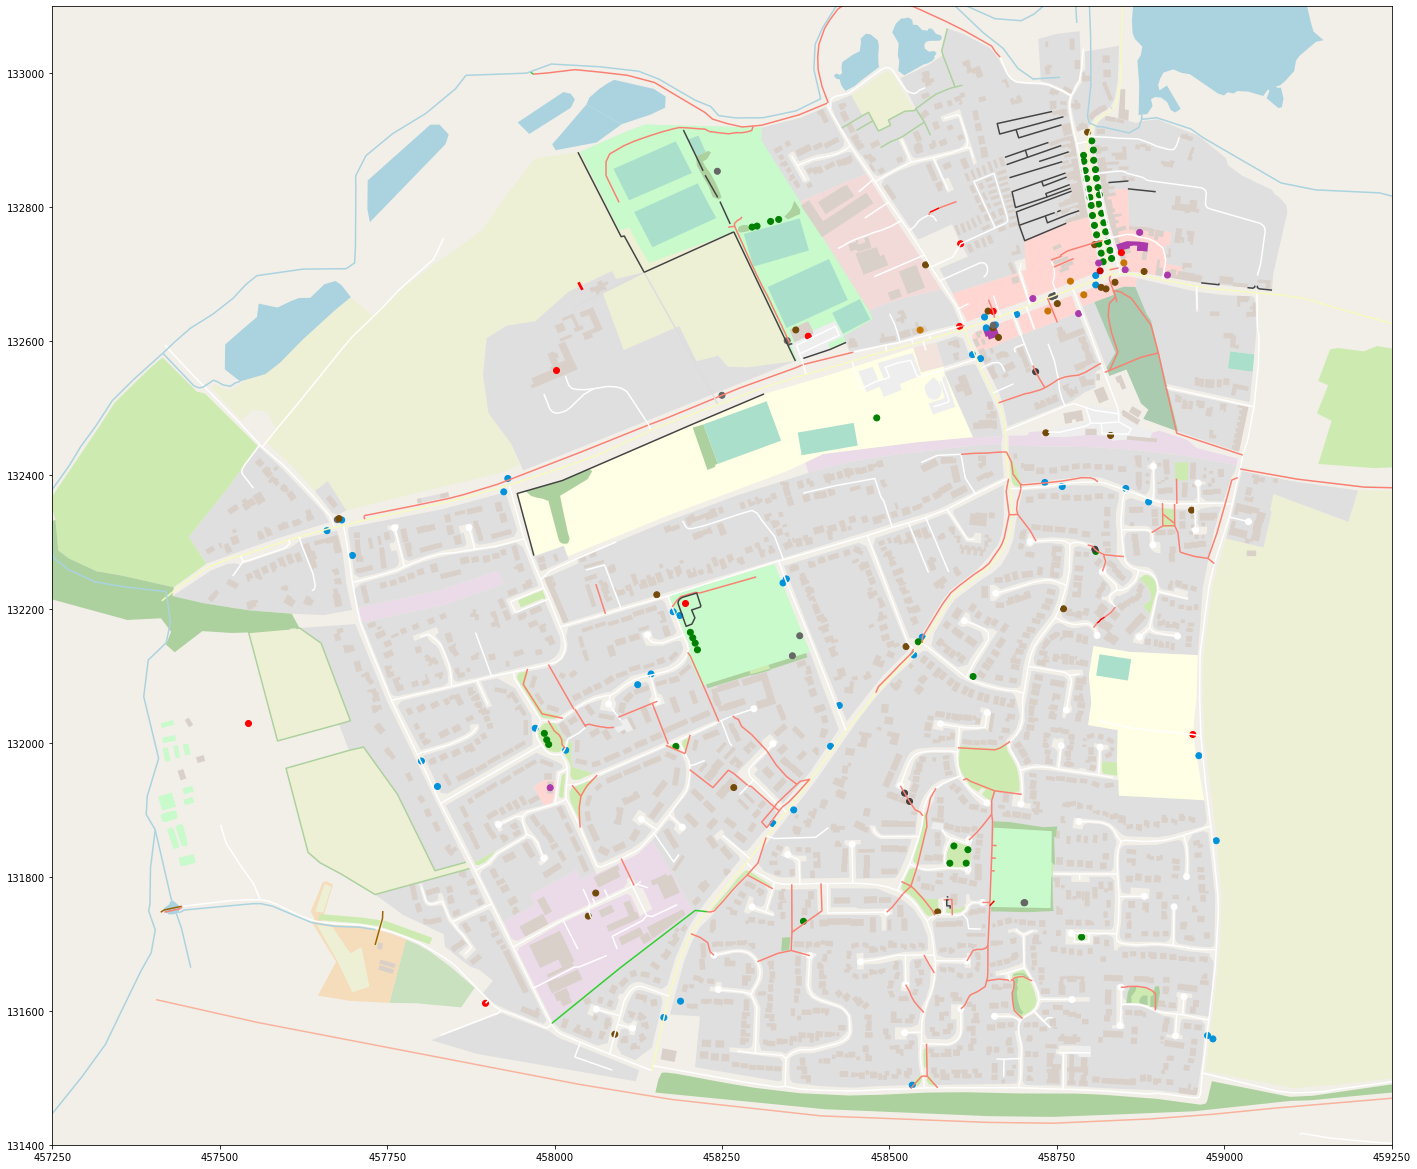

In [197]:
carto_plot(alr, tags, left=457250, right=459250, top=133100, bottom=131400)

### Lunkuni

***https://www.openstreetmap.org/#map=16/-4.1414/17.5809***

In [8]:
lnk = ox.gdf_from_place('Lunkuni', tags=tags, buffer_dist=500)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f080f4a0320>)

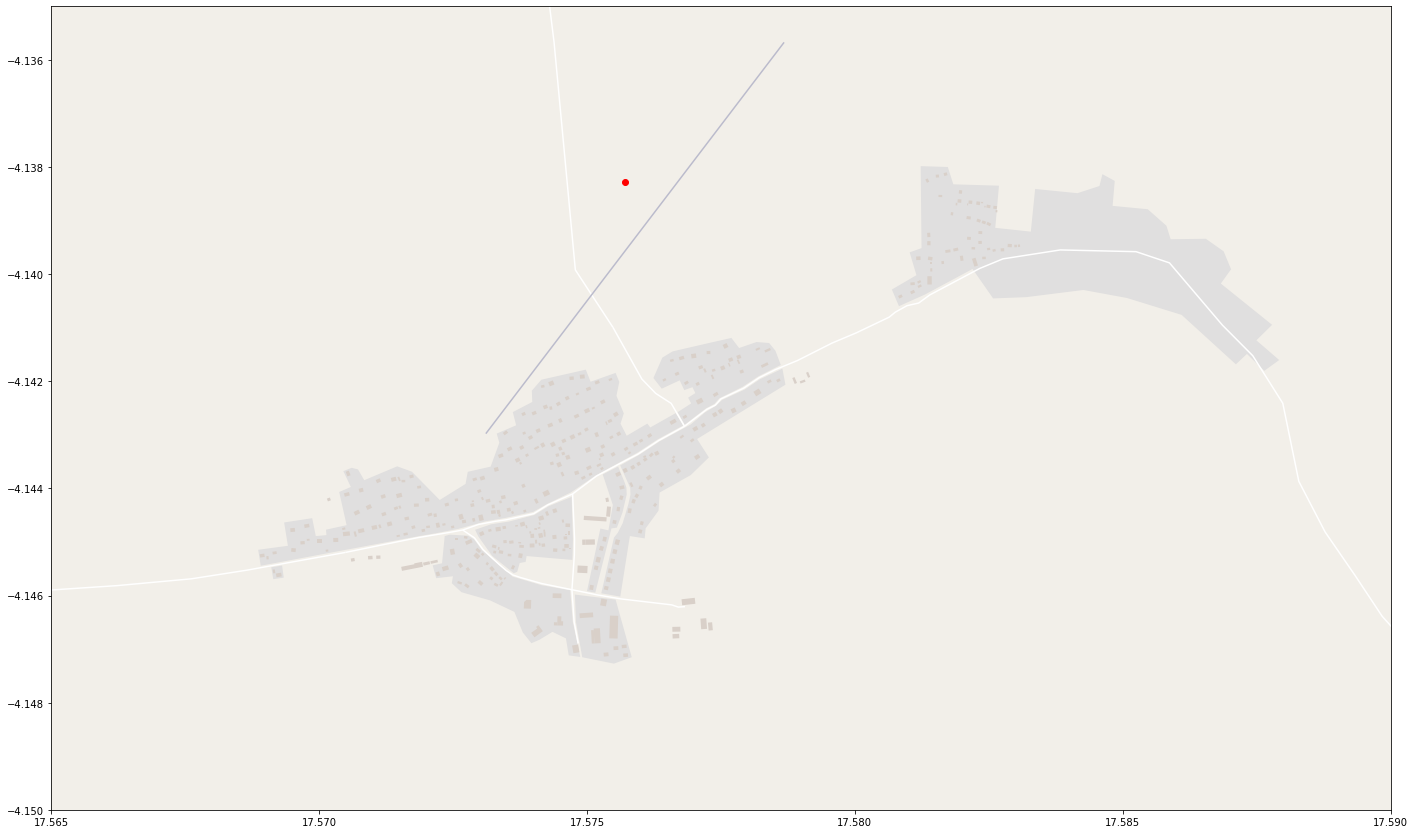

In [175]:
carto_plot(lnk, tags, top=-4.135, bottom=-4.15, left=17.565, right=17.59)

### Fatundu

***https://www.openstreetmap.org/#map=12/-3.7005/17.5297***

In [158]:
fat = ox.gdf_from_point((-3.6628,17.5383), tags=tags, dist=30000)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

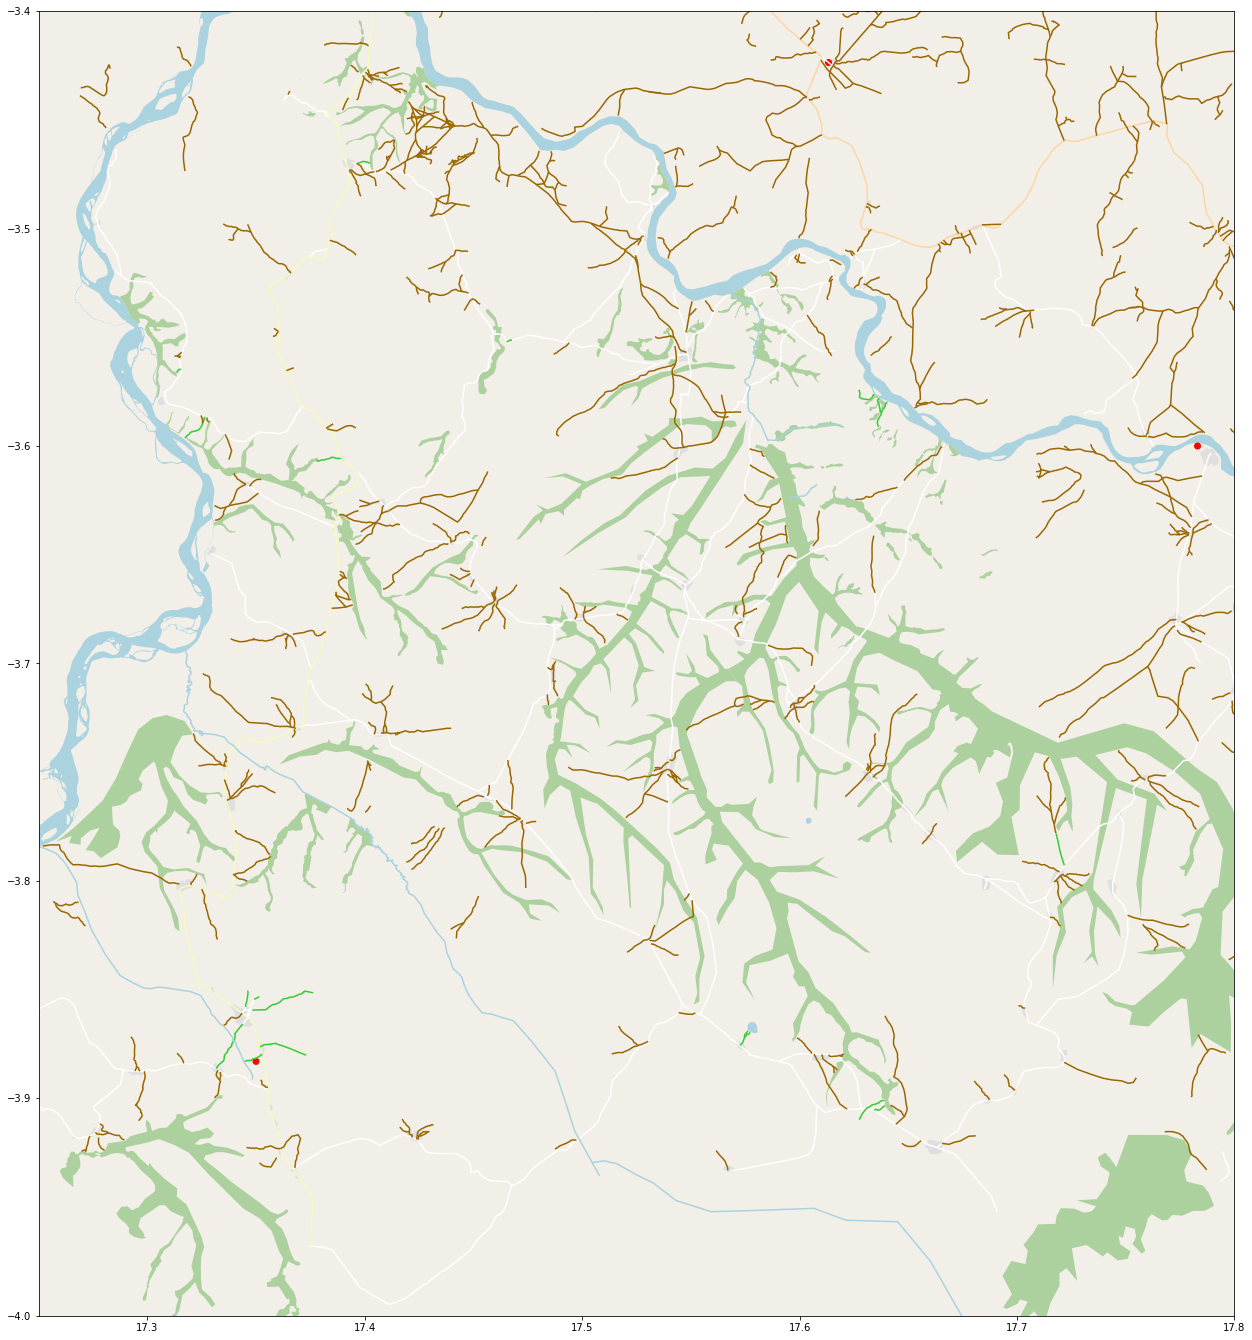

In [198]:
fig,ax = carto_plot(fat, tags, left=17.25, right=17.8, top=-3.4, bottom=-4)

### Alton

***https://www.openstreetmap.org/#map=16/51.1500/-0.9725***

In [146]:
alt = ox.gdf_from_place('Alton, Hampshire', tags=tags)
alt.to_crs(epsg=27700, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f080cbe81d0>)

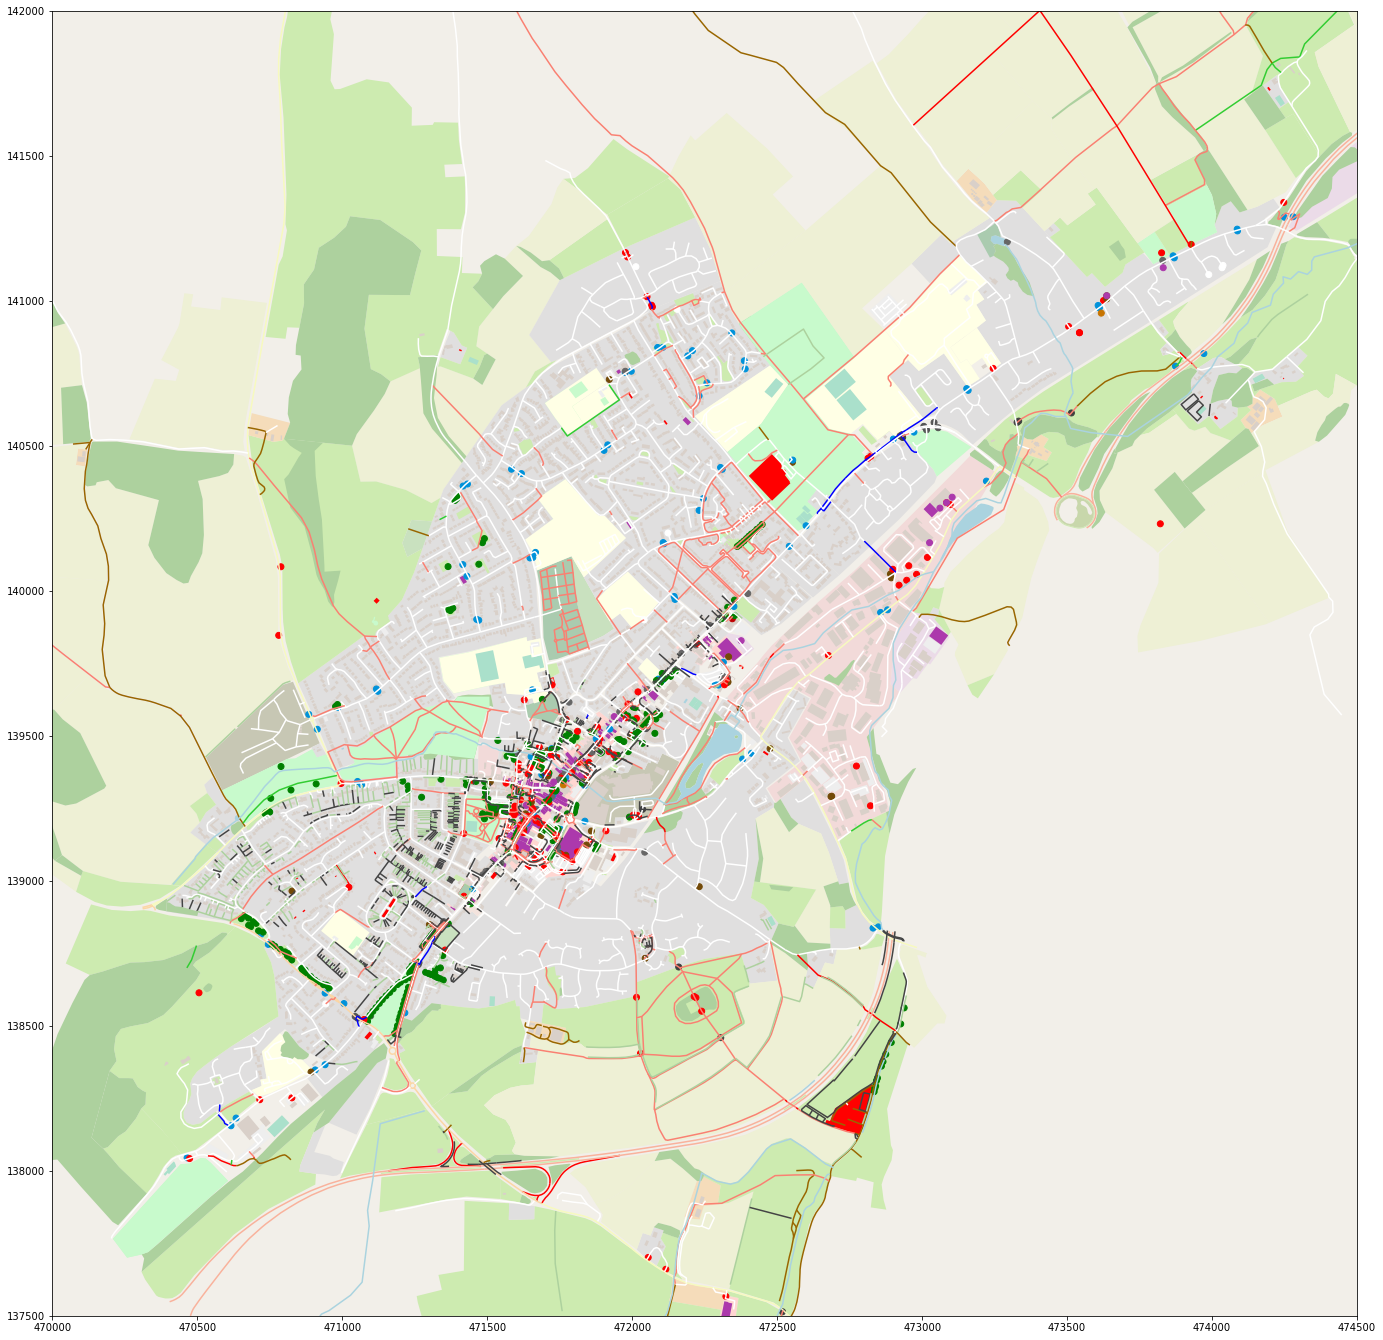

In [200]:
carto_plot(alt, tags, left=470000, right=474500, top=142000, bottom=137500)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f080c011208>)

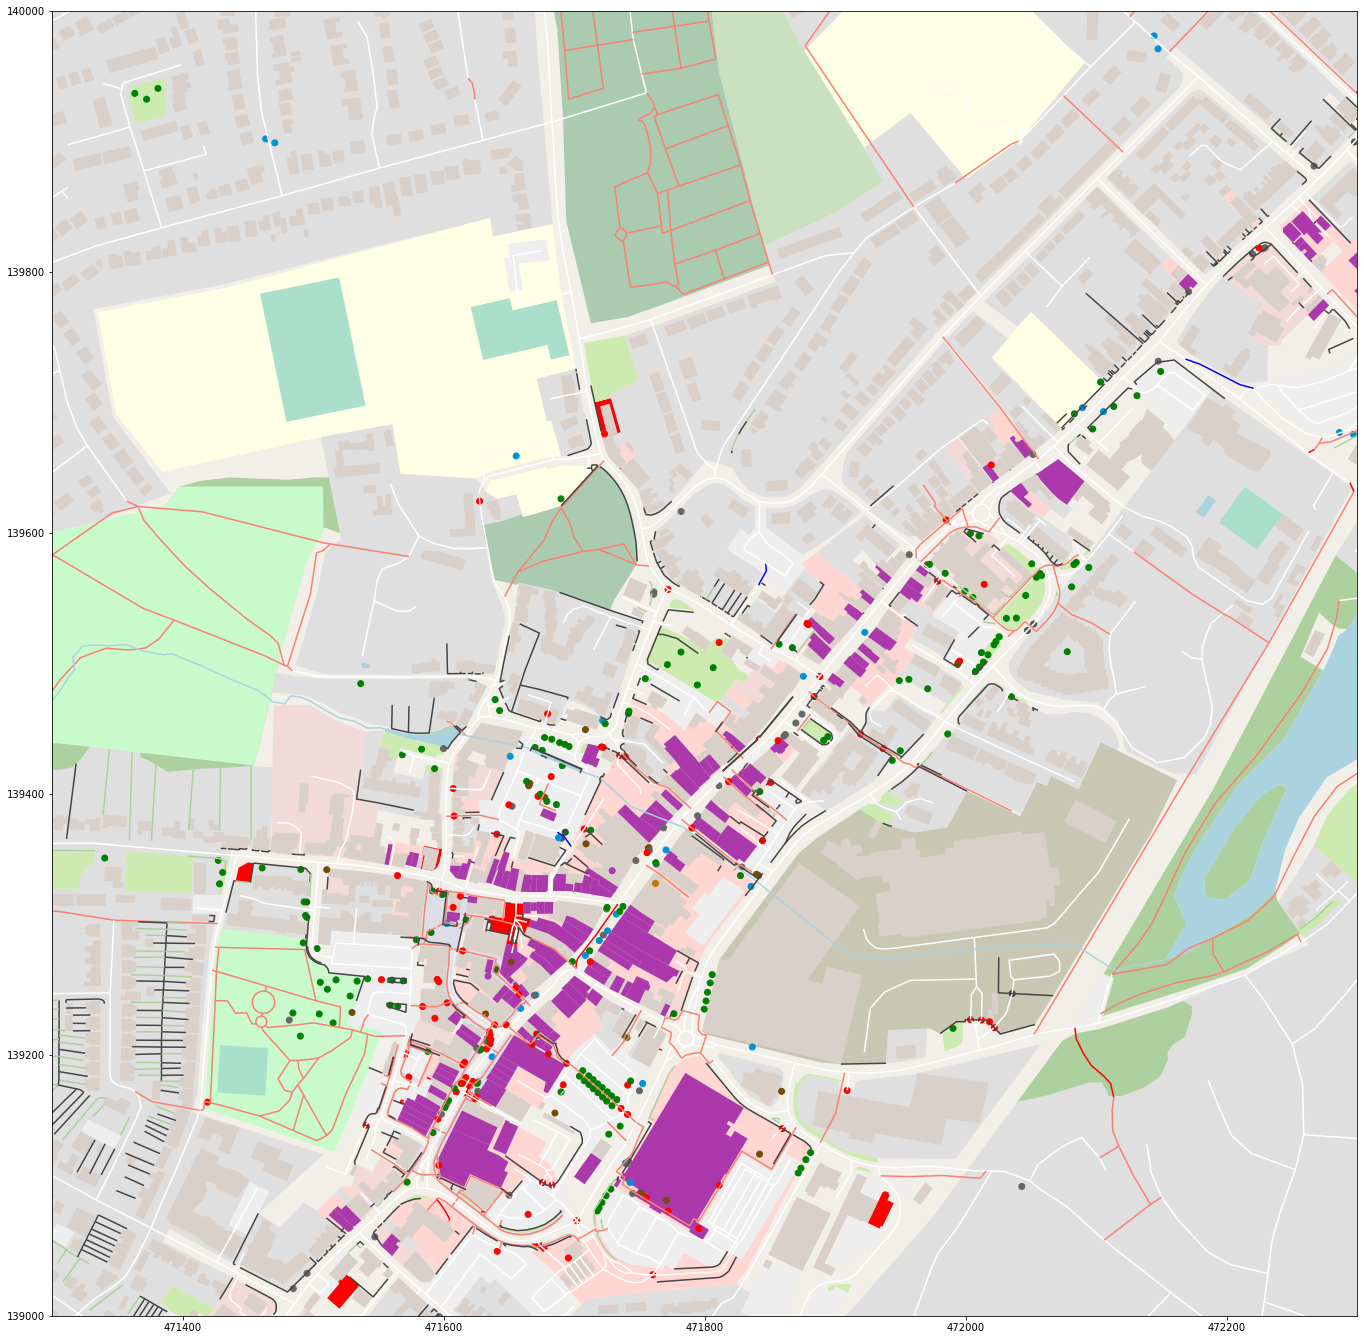

In [202]:
#carto_plot(alt, tags, left=470000, right=474500, top=142000, bottom=137500)
# zoom in
carto_plot(alt, tags, left=471300, right=472300, top=140000, bottom=139000)

### Triana

***https://www.openstreetmap.org/#map=16/37.3858/-6.0012***

In [204]:
tri = ox.gdf_from_point((37.3861,-6.0022), tags=tags)
tri.to_crs(epsg=25830, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f080ac54f60>)

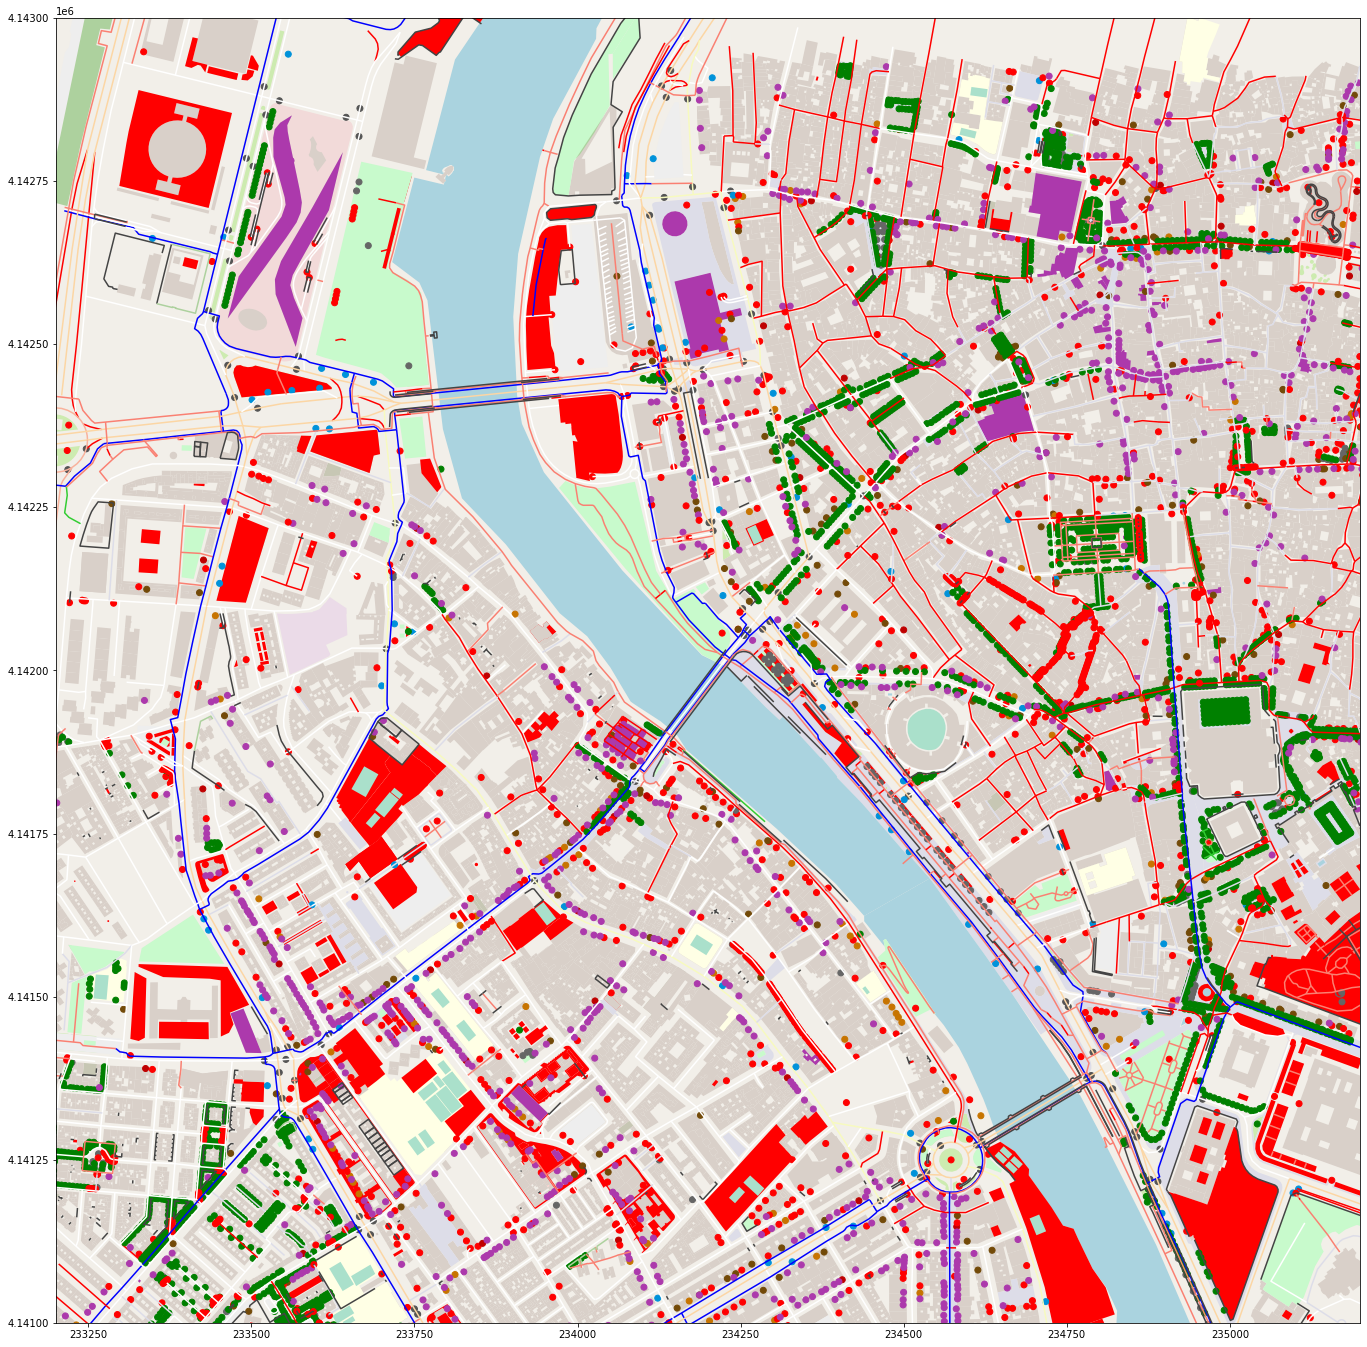

In [213]:
carto_plot(tri, tags, top=4143000, bottom=4141000, left=233200, right=235200)

### Bukavu

***https://www.openstreetmap.org/#map=11/-2.3641/29.2003***

In [224]:
%%time
buk = ox.gdf_from_point((-2.3189,29.2209), dist=30000, tags={'landuse': True, 'highway': True, 'waterway': True, 'natural': True})
buk = ox.project_gdf(buk)

CPU times: user 1min 30s, sys: 480 ms, total: 1min 31s
Wall time: 1min 37s


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1728x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07ed4eda90>)

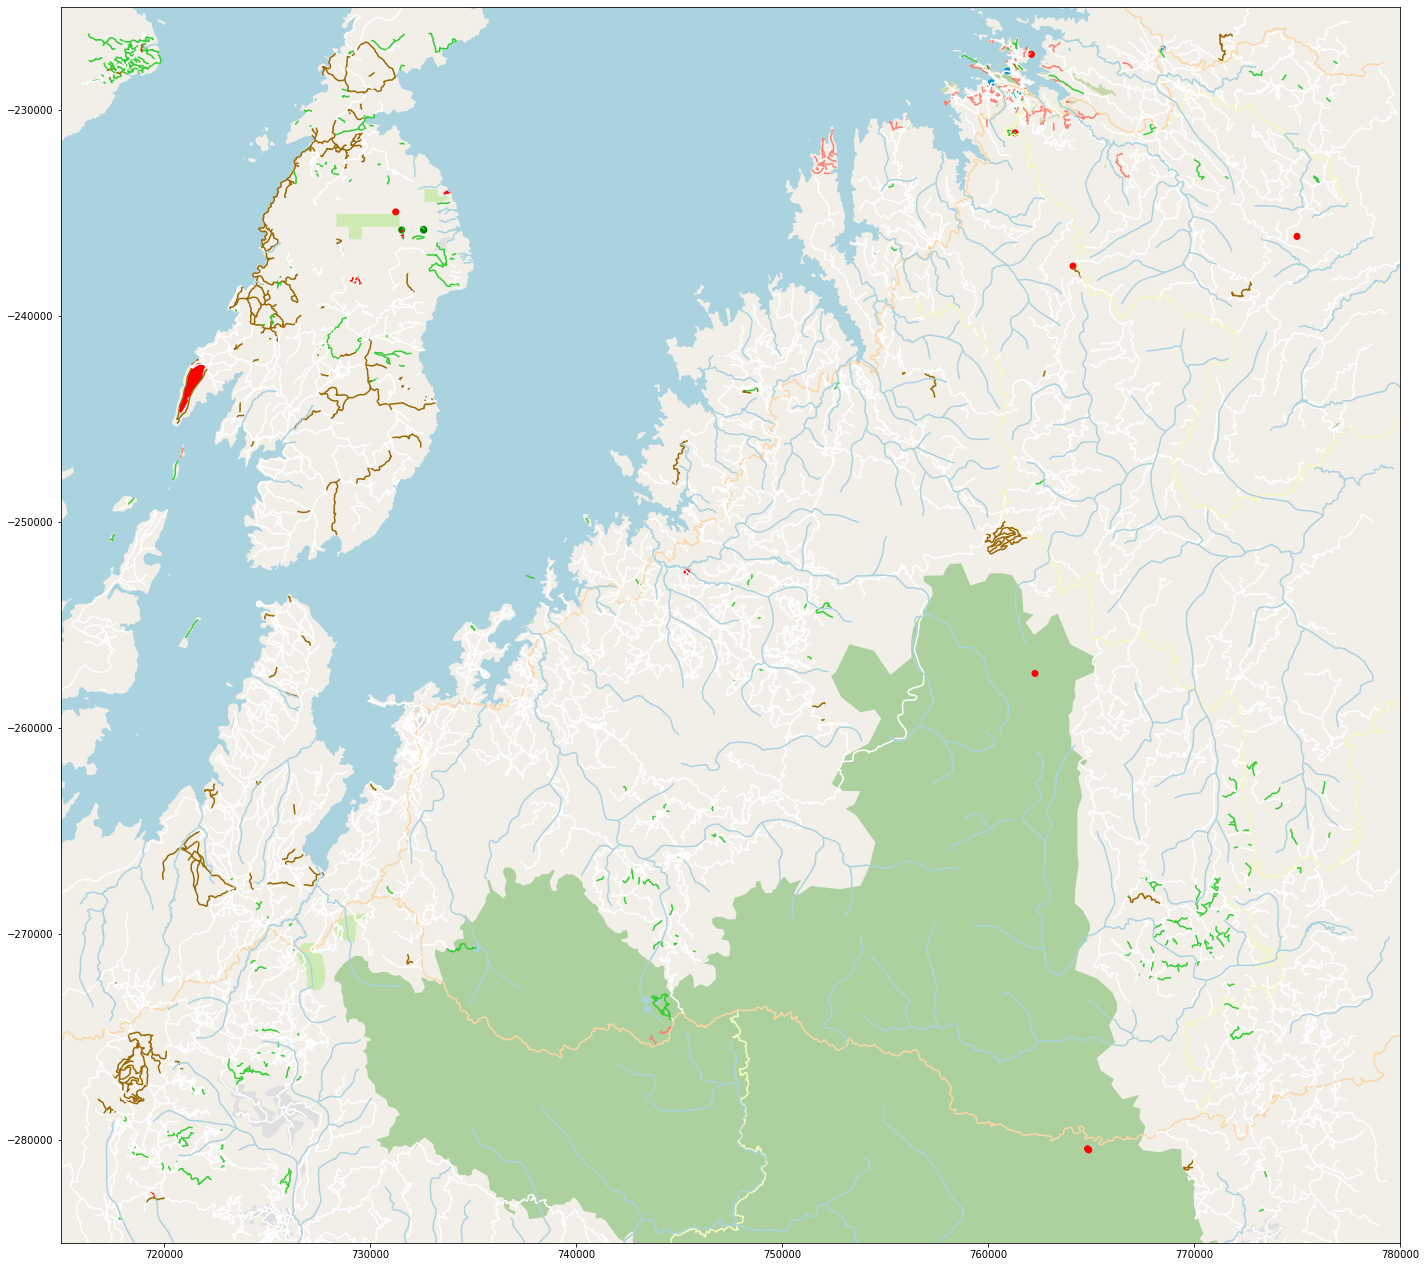

In [227]:
carto_plot(buk, tags={'landuse': True, 'highway': True, 'waterway': True, 'natural': True}, top=-225000, bottom=-285000, left=715000, right=780000)